In [34]:
#Importar librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from scipy.stats import norm, kurtosis
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from scipy.stats import chi2

# Montar el contenido del drive-directorio donde tienen los datasets:

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ejercicio 1 de práctica actualizada:

El dataset student_data.csv contiene información sobre el promedio de horas semanales de estudio
que un conjunto de estudiantes dedicó para la preparación de un examen y la calificación final recibida
luego de rendirlo.
1. a) Realice un gráfico que le permita visualizar la relación existente entre las calificaciones
finales y las horas de estudio del grupo de estudiantes.
b) ¿Cómo describiría dicha relación a partir de lo observado?
c) ¿Qué métrica utilizaría para cuantificar el grado de asociación lineal entre ambas variables?
Calcúlela e interprete el valor obtenido.
2. A partir de los datos, ajuste un modelo de regresión lineal para la calificación final del examen
en función de las horas semanales de estudio. Represente gráficamente el modelo ajustado en el
gráfico realizado en el ítem 1.
3. Escriba el modelo ajustado en forma desarrollada e interprete cada uno de los coeficientes que
lo componen.

# Vamos a analizar los residuos del modelo de este problema, el código puede extenderse a cualquier otro de los ejercicios de la práctica.

In [29]:
'''
Vamos a importar los datos de un csv. Editar en función a sus propias rutas al archivo en el drive.
'''

estudiantes=pd.read_csv('/content/drive/MyDrive/Datasets_fundamentos/student_data.csv')

#vemos qué aparece en el dataset
estudiantes

,Unnamed: 0,hours_studied,exam_scores
0,1,9.3,63.1
1,2,23.9,90.4
2,3,12.9,63.2
3,4,26.6,87.8
4,5,28.3,92.9
...,...,...,...
240,241,16.9,77.1
241,242,20.2,82.0
242,243,6.0,62.2
243,244,19.4,79.1


In [30]:
#eliminamos la columna innecesaria.
estudiantes.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
estudiantes.columns

Index(['hours_studied', 'exam_scores'], dtype='object')

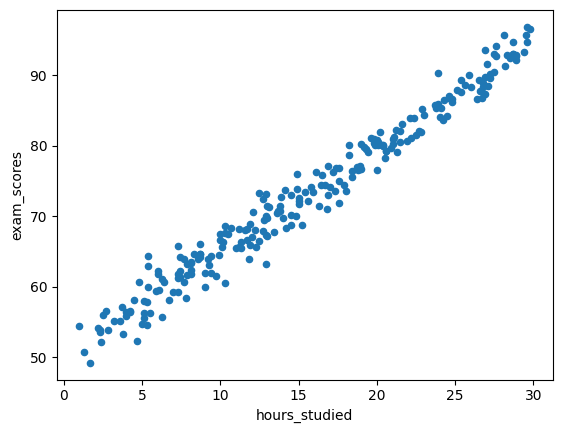

In [32]:
#vamos a visualizar la relación entre la calificación final y las horas de estudio. El gráfico más apropiado es el scatter
# gráfico de dispersión o scatterplot.

estudiantes.plot(kind='scatter', x='hours_studied', y='exam_scores');

Se observa relación lineal positiva, a medida que los estudiantes dedican más horas al estudio sus calificaciones son más altas.

In [12]:
#vamos a calcular la correlación de Pearson

estudiantes.corr('pearson')



,hours_studied,exam_scores
hours_studied,1.000000,0.986093
exam_scores,0.986093,1.000000


Se muestra una correlacion positiva muy alta (0.986)
entre las horas de estudio y la calificción en los exámenes. Coincidente con lo que se observa en el gráfico de dispersión.

In [13]:
#ajustamos el modelo de regresión lineal:

mod_estudiantes = smf.ols(formula='exam_scores ~ hours_studied', data=estudiantes)

res_estudiantes = mod_estudiantes.fit()
print(res_estudiantes.summary())

                            OLS Regression Results                            
Dep. Variable:            exam_scores   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     8555.
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          2.11e-191
Time:                        15:53:23   Log-Likelihood:                -512.26
No. Observations:                 245   AIC:                             1029.
Df Residuals:                     243   BIC:                             1036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        50.2541      0.278    180.576

El modelo sería entonces:

Nota_final = 50.25 + 1,48 x Horas_estudiadas + error

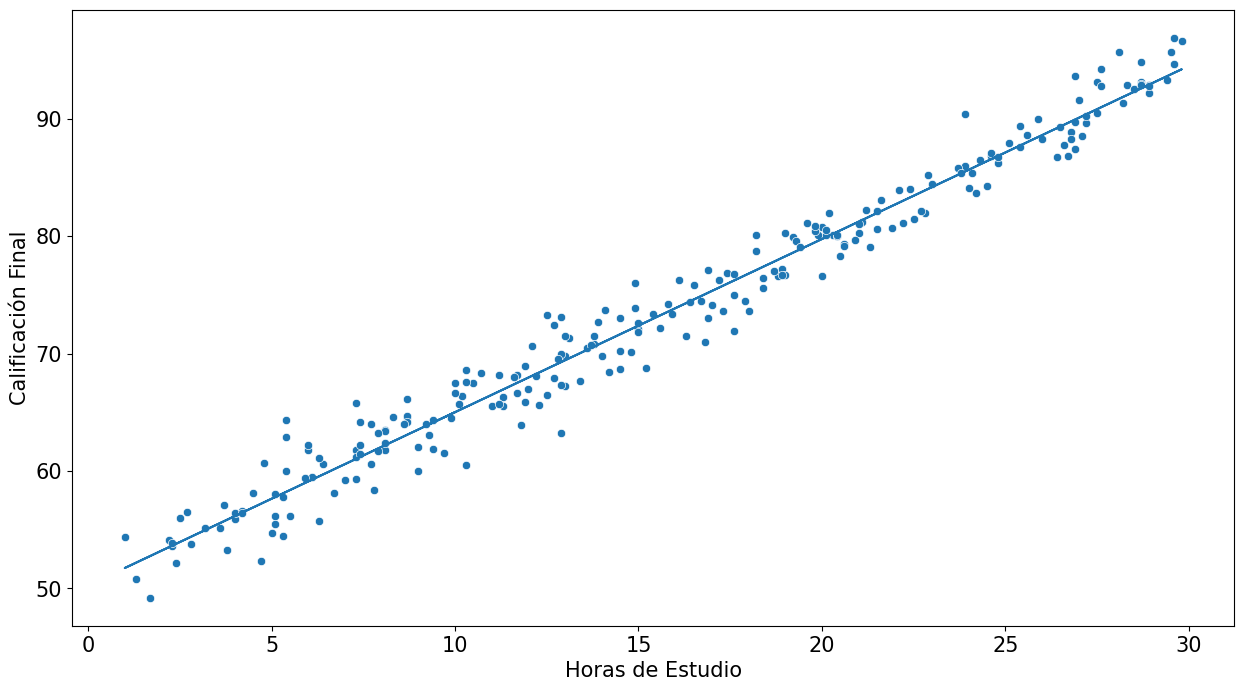

In [14]:
# gráficar los resultados del modelo:

plt.figure(figsize=(15,8))
sns.scatterplot(x='hours_studied',y='exam_scores', data = estudiantes)
plt.plot(estudiantes['hours_studied'], res_estudiantes.predict(estudiantes['hours_studied']))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Horas de Estudio',fontsize = 15)
plt.ylabel('Calificación Final',fontsize = 15);

# Análisis de Residuos del Modelo:

Vamos a ver en un primer punto de nuevo la salida de este modelo simple de regresión lineal:

In [15]:
mod_estudiantes = smf.ols(formula='exam_scores ~ hours_studied', data=estudiantes)

res_estudiantes = mod_estudiantes.fit()
print(res_estudiantes.summary())

                            OLS Regression Results                            
Dep. Variable:            exam_scores   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     8555.
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          2.11e-191
Time:                        15:56:31   Log-Likelihood:                -512.26
No. Observations:                 245   AIC:                             1029.
Df Residuals:                     243   BIC:                             1036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        50.2541      0.278    180.576

# Un breve resumen de lo que se ve en el cuadrito de residuos:


**Skew(sesgo)** evalúa la asimetría de los residuos. En este caso el ideal es que sea cero (o muy cercano a cero). Es el momento de grado 3, la fórmula de calculo es $$sesgo= \frac{E(X-\mu)^3}{(\sigma)^3}$$

Si hay cola larga hacia la derecha el sesgo es positivo, si hay cola larga a la izquierda el sesgo es negativo.

**Curtosis**: es el momento de grado 4, evalúa que tan concentrados alrededor de la media están los residuos. Su fórmula de cálculo es $$curtosis=\frac{E(X-\mu)^4}{(\sigma)^4}$$

Se compara con el valor de curtosis de la distribución normal que es 3 (mesocúrtica). Si es mayor a 3 es leptocúrtica y si es menor que 3 es platicúrtica.

**Omnibus**: es un test estadístico que evalúa en conjunto la asimetría y la curtosis de los residuos. La hipótesis nula del test Ho es que los residuos son normales. Debajo, en el cuadro vemos el valor de la probabilidad asociada del test que nos permite inferir si se puede rechazar o no la hipótesis nula.


**Durbin Watson**: este estadístico mide la correlación de los residuos. Varía entre o y 4. Si el estadístico de DW es 2 no hay correlación de residuos.
Si tiende a cero hay autocorrelación positiva fuerte (los residuos dependen con el mismo signo del anterior), si tiende a 4 hay autocorrelación negativa fuerte (alternan signos).

El test de **Jarque Bera** tiene un estadístico que se distribuye chi2 con 2 grados de libertad. La idea de este test es comprobar cuanto se mueven los residuos de los valores ideales de asimetría y kurtosis para en los valores de los residuos.

El estadístico del test tiene la siguiente fórmula:



donde n es el número de observaciones, K es la kurtosis observada y S la asimetría. El valor p asociado corresponde a la probabilidad asociada en el estadístico observado sobre la distribución chi^2.


**Cond No**: indica si las variables independientes están muy correlacionadas entre sí, lo que puede derivar en problemas de multicolinealidad.

Se calcula a partir de los autovalores de la matriz de diseño de las variables explicativas, X.

$$ Cond. No=\sqrt{\frac{\lambda_{max}}{\lambda_{min}}}$$

Donde $$\lambda_{max}$$  y $$\lambda_{min}$$ Son los máximos y mínimos autovalores de la matriz de diseño X.

Si es menor que 30 no hay problemas, hasta 100 se puede considerar colinealidad leve, más de 100 ya podríamos tener problemas de multicolinealidad e inestabilidad de los coeficientes, con más de 1000 ya el modelo deja de ser confiable por la afectación provocada por la multicolinealidad. Por esto es muy importante revisar la correlación entre las variables independientes del modelo a la hora de la selección de variables.

Visualizar primero el **sesgo** en los residuos:

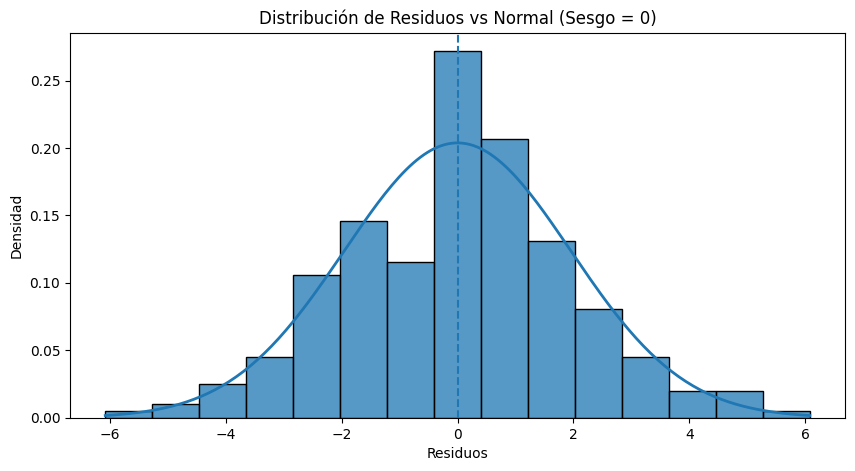

In [21]:
residuos = res_estudiantes.resid
media_res = np.mean(residuos)
std_res = np.std(residuos)

# Generación de valores para la curva normal teórica
x = np.linspace(min(residuos), max(residuos), 200)
normal_teorica = norm.pdf(x, loc=0, scale=std_res)  # Normal con media 0 (sin sesgo)

plt.figure(figsize=(10,5))

# Histograma + normal teórica
sns.histplot(residuos, kde=False, stat='density')
plt.plot(x, normal_teorica, linewidth=2)
plt.axvline(0, linestyle='--')  # Línea de media ideal
plt.title("Distribución de Residuos vs Normal (Sesgo = 0)")
plt.xlabel("Residuos")
plt.ylabel("Densidad")
plt.show()

En este caso el valor identificado en el sesgo (skew) de los residuos es -0.007 que es muy cercano a cero y la distribución de los residuos resulta simétrica.

Ahora continuamos con la **curtosis**:

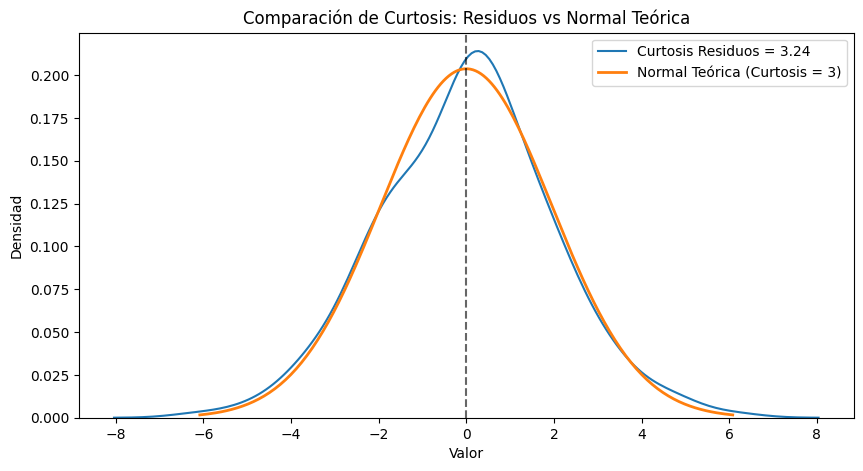

In [24]:
# Curtosis
curt_residuos = kurtosis(residuos, fisher=False)  # fisher=False → curtosis normal = 3
media_res = np.mean(residuos)
std_res = np.std(residuos)

# Distribución normal teórica
x = np.linspace(min(residuos), max(residuos), 200)
normal_teorica = norm.pdf(x, loc=0, scale=std_res)

plt.figure(figsize=(10,5))

sns.kdeplot(residuos, label=f"Curtosis Residuos = {curt_residuos:.2f}")
plt.plot(x, normal_teorica, label="Normal Teórica (Curtosis = 3)", linewidth=2)

plt.axvline(0, linestyle="--", color="black", alpha=0.6)
plt.title("Comparación de Curtosis: Residuos vs Normal Teórica")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.show()


Si la curtosis es cercana a 3 tenemos una distribucuión mesocúrtica (como en este caso).

Test Omnibus: tenemos un valor p de 0.645 que es mayor a un nivel de confianza $\alpha$ del 5% (0.05). No podemos rechazar la hipótesis nula de que los residuos del modelo son normales en base a este test.

Durbin-Watson: 2.190


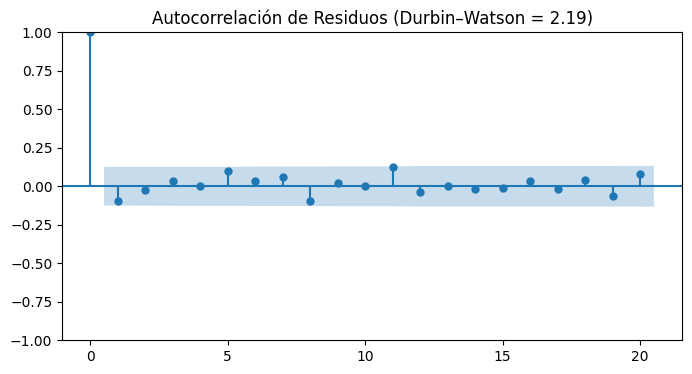

In [26]:
dw = durbin_watson(residuos)
print(f"Durbin-Watson: {dw:.3f}")

# Visualización ACF
fig, ax = plt.subplots(figsize=(8,4))
sm.graphics.tsa.plot_acf(residuos, lags=20, ax=ax)
ax.set_title(f"Autocorrelación de Residuos (Durbin–Watson = {dw:.2f})")
plt.show()


Jarque Bera: calculamos el estadístico:

$$JB=\frac{n}{6}\left(S^2+\frac{(K-3)^2}{4}\right)$$

Donde n es el nro de observaciones, en este caso 245, S es el sesgo calculado (S=-0.007) y la curtosis (K=3.24).

Reemplazando en la fórmula tenemos:

$$JB=\frac{245}{6}\left((-0.007)^2+\frac{(3.24-3)^2}{4}\right)$$

$$JB=0.585$$

Ahora calculamos el valor de la probabilidad asociada en la distribución Chi^2 con 2 grados de libertad.



In [36]:
JB=0.585

p_value_JB = 1 - chi2.cdf(JB, df=2)

print('el valor P asociado al test de Jarque Bera es: ',round(p_value_JB,3))

el valor P asociado al test de Jarque Bera es:  0.746


Con este valor p asociado al test de Jarque Bera no podemos rechazar la hipótesis nula de distribución normal de residuos, coincidiendo entonces con la prueba de Omnibus.

El Cond. No en este caso es 38.8, no hay indicios de multicolinealidad. Además al ser una sola variable independiente no habría que mirar este indicador.

Los cálculos de la descomposición (complemetarios y fuera del alcance de la materia están abajo):

In [40]:
#Construcción de la matriz X
X = estudiantes[['hours_studied']]
X = sm.add_constant(X)  # agregar intercepto

# descomposición en valores singurales de la matriz de diseño
U, singular_vals, Vt = np.linalg.svd(X)

cond_number = max(singular_vals) / min(singular_vals)
print("Condition Number:", round(cond_number,1))

Condition Number: 38.8


Fuera del resumen que se muestra en la tabla de OLS, se puede graficar residuos versus valores ajustados para poder comprobar si la varianza permanece constante en los residuos (homocedasticidad de residuos).

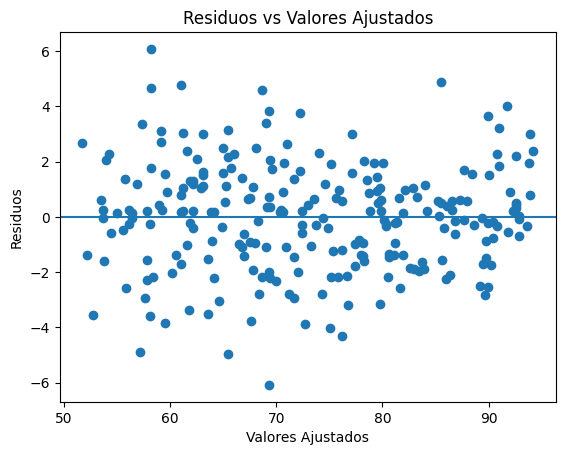

In [41]:
residuals = res_estudiantes.resid
fitted = res_estudiantes.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(y=0)
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores Ajustados")
plt.show()

Aquí no observamos ningún patrón por lo que se consideran residuos homocedásticos.

In [ ]:
# convertimos las variables categóricas
data['fem_dummy'] = 0
data.loc[data['sex']=='female', 'fem_dummy'] = 1
data['male_dummy'] = 0
data.loc[data['sex']=='male', 'male_dummy'] = 1
for region in ['southwest', 'southeast', 'northwest', 'northeast']:
  data[region] = 0
  data.loc[data['region']==region, region] = 1

In [ ]:
mod = smf.ols(formula='charges ~ bmi + age + fem_dummy + male_dummy + southwest + southeast + northwest + northeast', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     31.22
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           3.04e-35
Time:                        21:36:58   Log-Likelihood:                -14390.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1331   BIC:                         2.883e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3441.2696   1023.758     -3.361      0.0

In [ ]:
data[data['northweast']]

,age,sex,bmi,children,smoker,region,charges,fem_dummy,southwest,southeast,northwest,northweast,male_dummy
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0,1,0,1
